# Лекция №3

## Simple Thresholding
Здесь все просто. Если значение пикселя больше порогового значения, ему присваивается одно значение (может быть белым), в противном случае ему присваивается другое значение (может быть черным). Используемая функция **cv2.threshold(src, thresh, maxval, type)**

* **src** $-$ исходное изображение, которое должно быть изображением в градациях серого
* **thresh** $-$ пороговое значение, которое используется для классификации значений пикселей
* **maxval** $-$ представляет значение, которое будет дано, если значение пикселя больше (иногда меньше) порогового значения
* **type** $-$ предоставляет различные стили порогового значения.

Различные типы:
1. cv2.THRESH_BINARY
2. cv2.THRESH_BINARY_INV
3. cv2.THRESH_TRUNC
4. cv2.THRESH_TOZERO
5. cv2.THRESH_TOZERO_INV

На выходе функция возвращает два значения. Первый $-$ **retval**, которое будет объяснено позже. Второй $-$ **thresholded image**.

Подробнее в [документации](https://docs.opencv.org/3.4.2/d7/d1b/group__imgproc__misc.html#gae8a4a146d1ca78c626a53577199e9c57).

Рассмотрим разные типы threshold на примере градиента серого цвета.

In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt

%matplotlib inline

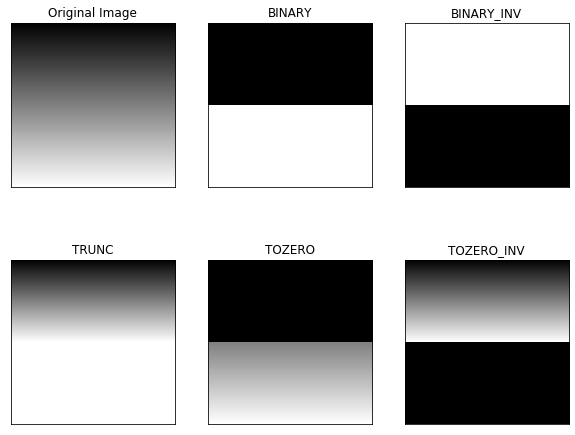

In [2]:
img = cv2.imread('img/grad_grayscale.png',0)

ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize=(10,8))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## Adaptive Thresholding
В предыдущем разделе мы использовали глобальное значение в качестве порогового значения. Но это может быть не хорошо во всех условиях, когда изображение имеет разные условия освещения в разных областях. В этом случае мы идем на адаптивный порог. При этом алгоритм вычисляет порог для небольших областей изображения. Таким образом, мы получаем разные пороговые значения для разных областей одного и того же изображения, и это дает нам лучшие результаты для изображений с разной освещенностью.

Он имеет три «специальных» входных параметра и только один выходной аргумент.

Адаптивный метод $-$ **cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C)** - решает, как рассчитывается пороговое значение.

* **thresholdType**:
    * *cv2.ADAPTIVE_THRESH_MEAN_C*: пороговое значение является средним значением области соседства.

    * *cv2.ADAPTIVE_THRESH_GAUSSIAN_C*: пороговое значение представляет собой взвешенную сумму значений окрестностей, где веса представляют собой гауссово окно.

* **blockSize** $-$ определяет размер окна.

* **C** $-$ это константа, которая вычитается из вычисленного среднего или взвешенного среднего.

Ниже приведен фрагмент кода, сравнивающий глобальные пороги и адаптивные пороги для изображения с различным освещением:

### Гауссово окно? Что?

Гауссова функция (гауссиан, гауссиана, функция Гаусса) — вещественная функция, описываемая следующей формулой:

${\displaystyle g\left(x\right)=a*exp{-{\frac {(x-b)^{2}}{2c^{2}}}}}$

Эта функция имеет широкое приминение в математической статистике. В таком случае параметры выражаются через среднеквадратичное отклонение ${\displaystyle \sigma }$ и математическое ожидание ${\displaystyle \mu }$ :

${\displaystyle a={\frac {1}{\sigma {\sqrt {2\pi }}}}}, {\displaystyle b=\mu }, {\displaystyle c=\sigma }$

В двумерном виде она имеет такое представление:

${\displaystyle g(x,y)=A\cdot exp{\left(-\left({\frac {(x-x_{0})^{2}}{2\sigma _{x}^{2}}}+{\frac {(y-y_{0})^{2}}{2\sigma _{y}^{2}}}\right)\right)}}$

Стандартным статистическим способом мы определили ширину гауссовой формы в терминах $\sigma$. Тем не менее, когда для сглаживания используется гауссиан, для сканеров характерно описывать ширину гауссиана с помощью другой связанной меры - полной ширины на половине максимума (FWHM).

FWHM - ширина ядра, равная половине максимума высоты гауссианы.

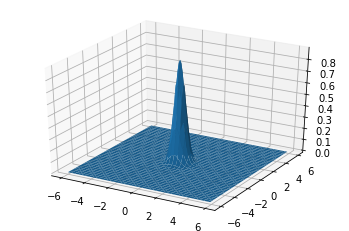

In [3]:
from mpl_toolkits.mplot3d import Axes3D

def fwhm2sigma(fwhm):
    return fwhm / np.sqrt(8 * np.log(2))
FWHM = 1
sigma = fwhm2sigma(FWHM)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
dx = 0.1
dy = 0.1
x = np.arange(-6, 6, dx)
y = np.arange(-6, 6, dy)
x2d, y2d = np.meshgrid(x, y)
kernel_2d = np.exp(-(x2d ** 2 + y2d ** 2) / (2 * sigma ** 2))
kernel_2d = kernel_2d / (2 * np.pi * sigma ** 2) # unit integral
ax.plot_surface(x2d, y2d, kernel_2d)
plt.show()

Таким образом, можно представить, что окно гаусса представляет из себя проекцию функции на плоскость. Проиллюстрировано на картинке:
<img src="../img/gaus_win.png" alt="Drawing" style="width: 300px;"/> 

Собственно, теперь перейдем к __threshold__.

In [4]:
img = cv2.imread('../img/sudoku.jpg')
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img = cv2.medianBlur(img,5)
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
plt.figure(figsize=(10,8))
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

error: OpenCV(4.1.0) C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


## Бинаризация Оцу
В первом разделе я говорил вам, что есть второй параметр retVal. Его использование происходит, когда мы идем на бинаризацию Оцу. Так что же это?

В глобальном пороговом значении мы использовали произвольное значение для порогового значения, верно? Итак, как мы можем знать, что выбранное нами значение является хорошим или нет? Ответ, метод проб и ошибок. Но рассмотрим бимодальное изображение (проще говоря, бимодальное изображение - это изображение, гистограмма которого имеет два пика). Для этого изображения мы можем приблизительно принять значение в середине этих пиков в качестве порогового значения, верно? Это то, что делает бинаризация Оцу. Таким образом, простыми словами, он автоматически вычисляет пороговое значение из гистограммы изображения для бимодального изображения. (Для изображений, которые не являются бимодальными, бинаризация не будет точной.)

Для этого используется наша функция **cv2.threshold()**, но передается дополнительный флаг *cv2.THRESH_OTSU*. Для порогового значения просто введите ноль. Затем алгоритм находит оптимальное пороговое значение и возвращает вас в качестве второго выхода retVal. Если пороговое значение Otsu не используется, **retVal** соответствует пороговому значению, которое вы использовали.

Проверьте ниже пример. Входное изображение является шумным изображением. В первом случае я применил глобальный порог для значения $127$. Во втором случае я применил порог Оцу напрямую. В третьем случае я отфильтровал изображение с гауссовым ядром $5\times5$, чтобы удалить шум, затем применил пороговое значение Оцу. Посмотрите, как фильтрация шума улучшает результат.

In [ ]:
img = cv2.imread('img/otsu_ex.jpg')
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
noise_img = img.copy()
mask = np.random.randint(0,2,size=noise_img.shape).astype(np.bool)
r = np.random.rand(*noise_img.shape)*np.max(noise_img)
noise_img[mask] = r[mask]

img = noise_img

# global thresholding
ret1,th1 = cv2.threshold(img,170,255,cv2.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
ret = [ret1, ret2, ret3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
plt.figure(figsize=(14,10))
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1] + ', threshold =' + str(ret[i])), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

# Свертки

## Основы сверток
**Свертки** $-$ это метод общей обработки сигналов. Люди, изучающие электронику, скажут вам о почти бесконечных бессонных ночах, которые были потрачены на их постижение. На эту тему написано множество книг. Но для компьютерного зрения мы просто разберемся с некоторыми простыми вещами.

## Определение
Во-первых, давайте посмотрим на математическое определение свертки в дискретной области времени. Позже мы пройдемся по тому, что говорит нам это уравнение.
${\begin{align}y[n]&=x[n]*h[n]=\sum_{k=-\infty}^\infty x[k]\cdot h[n-k]\end{align},}$

где:
* **x[n]** $-$ входой сигнал;
* **h[n]** $-$ импульсный отклик; 
* **y[n]** $-$ выходной сигнал;
* **$*$** $-$ обозначает свертку. 

Обратите внимание, что мы умножаем слагаемые $x[k]$ на смещенные по времени $h[n]$ и складываем их.
Краеугольный камень понимания свертки лежит в основе импульсного отклика и импульсного разложения.

## Разложение импульсной функции

Чтобы понять смысл свертки, мы собираемся начать с концепции разложения сигналов. Входной сигнал разлагается на простые аддитивные компоненты, и системный отклик входного сигнала приводит к сложению выходных данных этих компонентов, прошедших через систему.

В общем, сигнал может быть разложен как взвешенная сумма базовых сигналов. Например, в рядах Фурье любой периодический сигнал (даже прямоугольный импульсный сигнал) может быть представлен суммой функций синуса и косинуса. Но здесь мы используем импульсные (дельта) функции для базовых сигналов, а не синус и косинус.

Изучим следующий пример того, как сигнал разлагается на набор импульсных (дельта) функций:
<img src="https://i.ibb.co/CKQ5sKh/conv_img01.png" alt="Drawing" style="width: 200px;"/> 

Импульсная функция выглядит так: ${\delta(n)={\begin{cases}1, n=0\\ 0, n\ne0 \end{cases}}}$.  Тогда для данного примера $x[0]$ можно записать в виде ${x[0] = x[0] \cdot \delta[n-0] = 2 \cdot \delta[n-0]}$. Тогда $x[1]$ будет равен ${x[1] = x[1] \cdot \delta[n-1] = 3 \cdot \delta[n-1]}$, потому что ${\delta[n-1]}$ равна $1$ при $n = 1$ и ноль в других случаях. Таким же образом мы можем записать ${x[2] = x[2] \cdot \delta[n-2] = 1 \cdot \delta[n-2]}$, сдвинув ${\delta[n]}$ на 2. Следовательно, сигнал $x[n]$ может быть представлен добавлением $3$ сдвинутых и масштабированных импульсных функций.

В общем, сигнал может быть записан как сумма масштабированных и сдвинутых дельта-функций:
${\begin{align}x[n]=\sum_{k=0}^2 x[k]\cdot\delta[n-k]=x[0]\cdot\delta[n-0]+x[1]\cdot\delta[n-1]+x[2]\cdot\delta[n-2]\end{align}}$

## Импульсивный отклик
**Импульсный отклик** $-$ это выход системы, являющийся результатом импульсной функции в качестве входа.
Именно это обозначается за $h[n]$. Все волшебство именно тут. Для вас это перестанет быть магией на 2-3 курсе инстиута. 

Существует огромное множество преобразования для импульсного отклика. Мы рассмотрим только конечные формулы без понимания того, как работает математика.

<td> <img src="https://i.ibb.co/LNJ9h4L/conv_img02.png" alt="Drawing" style="width: 400px;"/> </td>

## Свертка в 2D
2D свертка является просто продолжением предыдущей 1D свертки путем свертки как горизонтального, так и вертикального направлений в двухмерной пространственной области. Свертка часто используется для обработки изображений, таких как сглаживание, повышение резкости и обнаружение краев изображений.

Импульсная (дельта) функция также находится в двумерном пространстве, поэтому ${\delta[m,n]={\begin{cases}1,\ m=n=0\\0,\ m\ne0,n\ne0\end{cases}}}$. Импульсный отклик в 2D обычно называют **«ядром»** или **«фильтром»** в обработке изображений.

<table><tr>
    <td> <img src="https://i.ibb.co/RQZ0p5S/conv2d_delta.jpg" alt="Drawing" style="width: 300px;"/> </td>
    <td> <img src="https://i.ibb.co/nCJMYR7/conv_img10.png" alt="Drawing" style="width: 200px;"/> </td>
</tr></table>

Кроме того, выходные данные линейной и инвариантной по времени системы могут быть записаны путем свертки входного сигнала $x[m,n]$ и импульсной характеристики $h[m,n]$:
${\begin{align}y[m,n]=x[m,n]*h[m,n]=\sum_{j=-\infty}^\infty \sum_{i=-\infty}^\infty x[i,j]\cdot h[m-i,n-j]\end{align}}$

Изучим пример, чтобы уточнить, как работает свертка в **2D**-пространстве.
Допустим, что размер импульсного отклика (ядра) составляет $3\times3$, а его значения **a, b, c, d, ...**

Обратите внимание, что начало координат $(0,0)$ находится в центре ядра.

Давайте выберем простейший пример и вычислим свертку, например, результат в $(1,1)$:
<img src="https://i.ibb.co/K9mCCgy/conv_img11.png" alt="Drawing" style="width: 200px;"/>
${\begin{align}
y[1,1] & = \sum_{j=0}^2 \sum_{i=0}^2 x[i,j] \cdot h[1-i,1-j]  \\ &
= x[0,0] \cdot h[1,1] + x[1,0] \cdot h[0,1] + x[2,0] \cdot h[-1,1] \\ &
+ x[0,1] \cdot h[1,0] + x[1,1] \cdot h[0,0] + x[2,1] \cdot h[-1,0] \\ &
+ x[0,2] \cdot h[1,-1] + x[1,2] \cdot h[0,-1] + x[2,2] \cdot h[-1,-1]
\end{align}}$

Рассмотрим более конкртеный пример с двумерной сверткой. Предположим, у нас есть входные матрицы $3\times3$ и ядра $3\times3$ следующим образом:

Input | Kernel | Output
-|-|-
<img src="https://i.ibb.co/1ZqbtRp/conv_img15.png" alt="Drawing" style="width: 200px;"/> | <img src="https://i.ibb.co/mybNNbh/conv_img16.png" alt="Drawing" style="width: 200px;"/> | <img src="https://i.ibb.co/hZKST86/conv_img17.png" alt="Drawing" style="width: 200px;"/>
Выходной сигнал в точке $(1,1)$ для этого примера будет:
${\begin{align}
\ y[1,1] & = \sum_{j=0}^2 \sum_{i=0}^2 x[i,j] \cdot h[1-i,1-j]  \\ &
\ = x[0,0] \cdot h[1,1] + x[1,0] \cdot h[0,1] + x[2,0] \cdot h[-1,1] \\ &
\ + x[0,1] \cdot h[1,0] + x[1,1] \cdot h[0,0] + x[2,1] \cdot h[-1,0] \\ &
\ + x[0,2] \cdot h[1,-1] + x[1,2] \cdot h[0,-1] + x[2,2] \cdot h[-1,-1] \\&
\ = 1 \cdot 1 + 2 \cdot 2 + 3 \cdot 1 \\ &
\ + 4 \cdot 0 + 5 \cdot 0 + 6 \cdot 0 \\ &
\ + 7 \cdot (-1) + 8 \cdot (-2) + 9 \cdot (-1) \\ &
\ = -24 \\
\end{align}}$

## 2D Свертки в OpenCV (Фильтрация изображений)

Как и в одномерных сигналах, изображения также могут быть отфильтрованы с помощью различных низкочастотных фильтров (LPF), высокочастотных фильтров (HPF) и т.д. 
**LPF** помогает удалять шумы, размывать изображения. Фильтры **HPF** помогают находить края в изображений.

**OpenCV** предоставляет функцию **cv2.filter2D()** для объединения ядра с изображением. В качестве примера мы попробуем усредняющий фильтр на изображении. Ядро усредняющего фильтра $5\times5$ будет выглядеть так:

${\begin{equation*}
\ K = \frac{1}{25} \begin{pmatrix}
1 & \ 1 & \ 1 & \ 1 & \ 1 \\
1 & \ 1 & \ 1 & \ 1 & \ 1 \\
1 & \ 1 & \ 1 & \ 1 & \ 1 \\
1 & \ 1 & \ 1 & \ 1 & \ 1 \\
1 & \ 1 & \ 1 & \ 1 & \ 1 
\end{pmatrix}
\end{equation*}}$

Свертка выполняется согласно теоретическим примерам выше. Как результат мы получаем осредненные пиксели своими 25 соседями.

In [ ]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
img = cv2.imread('img/8_ka.jpg')
## для отрисовки в pyplot
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [ ]:
kernel = np.ones((5,5), dtype=np.float32) / 25
dst = cv2.filter2D(img.copy(), -1, kernel)

fig, m_axs = plt.subplots(1, 2, figsize=(14, 10))
ax1, ax2 = m_axs

ax1.set_title('Исходное изображение')
ax1.imshow(img)
ax2.set_title('Результат свертки')
ax2.imshow(dst);

## Размытие изображения (Сглаживание изображения)
Размытие изображения достигается путем свертывания изображения с помощью фильтра нижних частот. Это полезно для удаления шумов. Это фактически удаляет высокочастотный контент (например: шум, края) с изображения. Таким образом, края в этой операции немного размыты. (Ну, есть методы размытия, которые тоже не размывают края). **OpenCV** предоставляет в основном четыре типа техники размытия.

Более подробное описание реализации фильтров OpenCV есть в [документации](https://docs.opencv.org/3.4.2/d4/d86/group__imgproc__filter.html).

### 1. Усреднение
Это делается путем свертки изображения с помощью нормализованного прямоугольного фильтра. Он просто берет среднее значение всех пикселей в области ядра и заменяет центральный элемент. Это выполняется функцией **cv2.blur()** или **cv2.boxFilter()**. Для более подробной информации о ядре посмотрите в документации. Мы должны указать ширину и высоту ядра. Нормализованный блочный фильтр $3\times3$ будет выглядеть следующим образом:

${\begin{equation*}K = \frac{1}{9} 
{\begin{pmatrix}
1 & \ 1 & \ 1 \\ 
1 & \ 1 & \ 1 \\ 
1 & \ 1 & \ 1 \end{pmatrix}}
\end{equation*}}$

In [ ]:
blur = cv2.blur(img,(3, 3))

fig, m_axs = plt.subplots(1, 2, figsize=(14, 10))
ax1, ax2 = m_axs

ax1.set_title('Исходное изображение')
ax1.imshow(img)
ax2.set_title('Результат свертки')
ax2.imshow(blur);

### 2. Размытие по Гауссу
При этом вместо box filter используется ядро Гаусса. Это делается с помощью функции **cv2.GaussianBlur()**. Мы должны указать ширину и высоту ядра, которые должны быть положительными и нечетными. Мы также должны указать стандартное отклонение в направлениях **X** и **Y**, **sigmaX** и **sigmaY** соответственно. Если указан только **sigmaX**, то **sigmaY** принимается так же, как **sigmaX**. Если оба даны в виде нулей, они рассчитываются по размеру ядра. Размытие по Гауссу очень эффективно для удаления гауссовского шума с изображения.

Если вы хотите, вы можете создать ядро Гаусса с помощью функции **cv2.getGaussianKernel()**, а затем применить его с помощью **cv2.filter2D()**.

In [ ]:
## Код для размытия по Гауссу: 

blur = cv2.GaussianBlur(img,(9,9),0)

fig, m_axs = plt.subplots(1, 2, figsize=(14, 10))
ax1, ax2 = m_axs

ax1.set_title('Исходное изображение')
ax1.imshow(img)
ax2.set_title('Результат свертки')
ax2.imshow(blur);

### 3. Среднее размытие
Здесь функция **cv2.medianBlur()** принимает медиану всех пикселей в области ядра, и центральный элемент заменяется этим медианным значением. Это очень эффективно против шума соли и перца на изображениях. Интересно, что в вышеупомянутых фильтрах центральным элементом является вновь вычисленное значение, которое может быть значением пикселя в изображении или новым значением. Но при медианном размытии центральный элемент всегда заменяется некоторым пиксельным значением на изображении. 

Эффективно снижает шум. Размер его ядра должен быть положительным нечетным целым числом.

В этой демонстрации я добавил шум к нашему исходному изображению и применил медианное размытие. Проверьте результат:

In [ ]:
## внесем шум
noise_img = img.copy()
mask = np.random.randint(0,2,size=noise_img.shape).astype(np.bool)
r = np.random.rand(*noise_img.shape)*np.max(noise_img)
noise_img[mask] = r[mask]

median = cv2.medianBlur(noise_img, 7)

fig, m_axs = plt.subplots(1, 2, figsize=(14, 10))
ax1, ax2 = m_axs

ax1.set_title('Исходное изображение')
ax1.imshow(noise_img)
ax2.set_title('Результат свертки')
ax2.imshow(median);

### 4. Двусторонняя фильтрация

**cv2.bilateralFilter()** очень эффективно удаляет шум, сохраняя края острыми. Но операция медленнее по сравнению с другими фильтрами. Мы уже видели, что фильтр Гаусса берет окрестность вокруг пикселя и находит его средневзвешенное значение по Гауссу. Этот гауссов фильтр является функцией только одного пространства, то есть при фильтрации учитываются соседние пиксели. Он не учитывает, имеют ли пиксели почти одинаковую интенсивность. Он не учитывает, является ли пиксель краевым или нет. Таким образом, это стирает края, что мы не хотим делать.

Двусторонний фильтр также принимает гауссов фильтр в пространстве, но еще один гауссов фильтр, который является функцией разности пикселей. Гауссова функция пространства обеспечивает размытие только соседних пикселей, а гауссова функция разности интенсивности - размытие только тех пикселей, интенсивность которых равна центральной. Таким образом, он сохраняет края, поскольку пиксели на краях будут сильно изменяться.

**Рекомендации к фильтру:**

* **Sigma values:** для простоты вы можете установить два значения сигмы одинаковыми. Если они маленькие ($<10$), фильтр не будет иметь большого эффекта, тогда как если они большие ($>150$), они будут иметь очень сильный эффект, делая изображение мультяшным.

* **Размер фильтра:** Большие фильтры (d$>5$) очень медленные, поэтому рекомендуется использовать d $=5$ для приложений реального времени и, возможно, d $=9$ для автономных приложений, которые нуждаются в сильной фильтрации шума.

Ниже приведены примеры использования двустороннего фильтра:

In [ ]:
## внесем шум
noise_img = img.copy()
mask = np.random.randint(0,2,size=noise_img.shape).astype(np.bool)
r = np.random.rand(*noise_img.shape)*np.max(noise_img)
noise_img[mask] = r[mask]

bilateral = cv2.bilateralFilter(noise_img, d=15, sigmaColor=250, sigmaSpace=250)

fig, m_axs = plt.subplots(1, 2, figsize=(14, 10))
ax1, ax2 = m_axs

ax1.set_title('Исходное изображение')
ax1.imshow(noise_img)
ax2.set_title('Результат свертки')
ax2.imshow(bilateral);

## Морфологические трансформации
Морфологические преобразования $-$ это простые операции, основанные на форме изображения. Обычно это выполняется на двоичных изображениях. Он требует двух входных данных, один из которых является нашим исходным изображением, второй называется структурирующим элементом или ядром, которое определяет характер операции. Два основных морфологических оператора - это **эрозия** и **растягивание**. Затем его разновидности, такие как открытие, закрытие, градиент и т. д.

**Эрозия** (размывание/сужение) изображения обычно используется для избавления от случайных вкраплений на изображении. Идея состоит в том, что вкрапления при размывании устранятся, тогда как крупные и соответсвенно более визуально-значимые регионы остаются.

**Растягивание** (расширение) же, по идее, так же должно устранять шум и способствовать объединению областей изображения, которые были разделены шумом, тенями.
Применение же небольшого растягивания должно сплавить эти области в одну.

Морфологические операции, чаще всего, применяются над двоичными изображениями, которые получаются после порогового преобразования (thresholding).
***
**Подробнее с математической морфологией можно ознакомиться по этим ссылка: [1](https://ru.wikipedia.org/wiki/%CC%E0%F2%E5%EC%E0%F2%E8%F7%E5%F1%EA%E0%FF_%EC%EE%F0%F4%EE%EB%EE%E3%E8%FF), [2](https://habr.com/post/113626/), [3](http://wiki.technicalvision.ru/index.php/%D0%9C%D0%BE%D1%80%D1%84%D0%BE%D0%BB%D0%BE%D0%B3%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B5_%D0%BE%D0%BF%D0%B5%D1%80%D0%B0%D1%86%D0%B8%D0%B8_%D0%BD%D0%B0_%D0%B1%D0%B8%D0%BD%D0%B0%D1%80%D0%BD%D1%8B%D1%85_%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F%D1%85).**

### 1. Эрозия
Основная идея эрозии похожа только на эрозию почвы, она размывает границы объекта переднего плана (всегда старайтесь, чтобы передний план оставался белым). Так, что это делает? Ядро скользит по изображению (как в **2D**-свертке). Пиксель в исходном изображении ($1$ или $0$) будет считаться $1$, только если все пиксели под ядром равны $1$, в противном случае он размыт (обнуляется).

Итак, что происходит, так это то, что все пиксели вблизи границы будут отбрасываться в зависимости от размера ядра. Таким образом, толщина или размер объекта переднего плана уменьшается или просто белая область уменьшается на изображении. Это полезно для удаления небольших белых шумов (как мы видели в главе о цветовом пространстве), отсоединения двух связанных объектов и т. д.

Здесь, в качестве примера, я бы использовал полное ядро $5\times5$. Давайте посмотрим, как это работает:

In [ ]:
img = cv2.imread('img/j.png')

kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)

fig, m_axs = plt.subplots(1, 2, figsize=(6, 4))
ax1, ax2 = m_axs

ax1.set_title('Исходное изображение')
ax1.imshow(img, cmap='gray')
ax2.set_title('Результат свертки')
ax2.imshow(erosion, cmap='gray');

### 2. Растягивание
Это просто противоположность эрозии. Здесь пиксельный элемент равен «$1$», если хотя бы один пиксель под ядром равен «$1$». Таким образом, увеличивается белая область в изображении или увеличивается размер объекта переднего плана. Обычно в таких случаях, как удаление шума, за эрозией следует расширение. Потому что эрозия удаляет белые шумы, но также уменьшает наш объект. Таким образом, мы расширяем это. Поскольку шум исчез, они не вернутся, но наша площадь объекта увеличивается. Это также полезно при соединении сломанных частей объекта.

In [ ]:
dilation = cv2.dilate(img,kernel,iterations = 1)

fig, m_axs = plt.subplots(1, 2, figsize=(6, 4))
ax1, ax2 = m_axs

ax1.set_title('Исходное изображение')
ax1.imshow(img, cmap='gray')
ax2.set_title('Результат свертки')
ax2.imshow(dilation, cmap='gray');

### 3. Открытие
Открытие - это просто еще одно название эрозии, за которой следует расширение. Это полезно для удаления шума, как мы объяснили выше. Здесь мы используем функцию **cv2.morphologyEx()**.

In [ ]:
## внесем шум
noise_img = img.copy()
mask = np.random.randint(0,2,size=noise_img.shape).astype(np.bool)
r = np.ones(noise_img.shape) * 255
noise_img[mask] = r[mask]

opening = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN, kernel)

fig, m_axs = plt.subplots(1, 2, figsize=(6, 4))
ax1, ax2 = m_axs

ax1.set_title('Исходное изображение')
ax1.imshow(img, cmap='gray')
ax2.set_title('Результат свертки')
ax2.imshow(opening, cmap='gray');

### 4. Закрытие
Закрытие является обратным открытию, растягивание с последующей эрозией. Это полезно при закрытии небольших отверстий внутри объектов переднего плана или маленьких черных точек на объекте.

In [ ]:
## внесем шум
noise_img = img.copy()
mask = np.random.randint(0,2,size=noise_img.shape).astype(np.bool)
r = np.zeros(noise_img.shape)
noise_img[mask] = r[mask]

opening = cv2.morphologyEx(noise_img, cv2.MORPH_CLOSE, kernel)

fig, m_axs = plt.subplots(1, 2, figsize=(6, 4))
ax1, ax2 = m_axs

ax1.set_title('Исходное изображение')
ax1.imshow(img, cmap='gray')
ax2.set_title('Результат свертки')
ax2.imshow(opening, cmap='gray');

### 5. Морфологический градиент
Это разница между расширением и размыванием изображения.

Результат будет выглядеть как контур объекта.

In [ ]:
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

fig, m_axs = plt.subplots(1, 2, figsize=(6, 4))
ax1, ax2 = m_axs

ax1.set_title('Исходное изображение')
ax1.imshow(img, cmap='gray')
ax2.set_title('Результат свертки')
ax2.imshow(gradient, cmap='gray');